<a href="https://colab.research.google.com/github/dahlia52/Commercial-District-Analysis/blob/main/code/%EC%97%B0%EB%A0%B9%EB%B3%84_%EC%9D%B8%EA%B5%AC%EC%88%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- 광진구의 남여 구분된 연령별 인구수 데이터를 살펴봤을 때, 광진구의 총인구는 337,071명

  남자는 162,329, 여자는 174,742명으로 여자가 더 많이 거주하고 있음.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#matplotlib 한글 깨짐 방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [ ]:
pop = pd.read_csv('/content/drive/MyDrive/광진구팟/Data/연령별_인구현황.csv', encoding='cp949')
pop.head()

,행정구역,2023년02월_계_총인구수,2023년02월_계_연령구간인구수,2023년02월_계_0세,2023년02월_계_1세,2023년02월_계_2세,2023년02월_계_3세,2023년02월_계_4세,2023년02월_계_5세,2023년02월_계_6세,...,2023년02월_계_91세,2023년02월_계_92세,2023년02월_계_93세,2023년02월_계_94세,2023년02월_계_95세,2023년02월_계_96세,2023년02월_계_97세,2023년02월_계_98세,2023년02월_계_99세,2023년02월_계_100세 이상
0,서울특별시 광진구 (1121500000),337071,337071,1197,1291,1263,1401,1499,1540,1837,...,267,175,163,131,102,46,48,32,24,41
1,서울특별시 광진구 화양동(1121571000),23434,23434,34,29,23,24,32,28,38,...,10,8,7,9,5,1,4,1,0,1
2,서울특별시 광진구 군자동(1121573000),19425,19425,57,64,59,55,69,67,86,...,7,6,6,3,7,3,2,6,1,3
3,서울특별시 광진구 중곡제1동(1121574000),15385,15385,69,59,53,69,54,52,57,...,11,8,7,3,5,3,1,0,2,0
4,서울특별시 광진구 중곡제2동(1121575000),20959,20959,64,66,57,77,101,87,96,...,10,4,12,10,9,2,5,0,5,2


In [ ]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Columns: 104 entries, 행정구역 to 2023년02월_계_100세 이상
dtypes: int64(103), object(1)
memory usage: 13.1+ KB


In [ ]:
pop['동'] = pop['행정구역'].map(lambda x: x[x.find("구")+2:x.find("(")])
pop['동구분코드'] = pop['행정구역'].map(lambda x: x[x.find('(')+1:-1])

In [ ]:
pop['동'][0] = '광진구'
pop.drop(['행정구역','2023년02월_계_연령구간인구수'],axis=1, inplace= True)

In [ ]:
pop.head()

,2023년02월_계_총인구수,2023년02월_계_0세,2023년02월_계_1세,2023년02월_계_2세,2023년02월_계_3세,2023년02월_계_4세,2023년02월_계_5세,2023년02월_계_6세,2023년02월_계_7세,2023년02월_계_8세,...,2023년02월_계_93세,2023년02월_계_94세,2023년02월_계_95세,2023년02월_계_96세,2023년02월_계_97세,2023년02월_계_98세,2023년02월_계_99세,2023년02월_계_100세 이상,동,동구분코드
0,337071,1197,1291,1263,1401,1499,1540,1837,2004,2028,...,163,131,102,46,48,32,24,41,광진구,1121500000
1,23434,34,29,23,24,32,28,38,35,44,...,7,9,5,1,4,1,0,1,화양동,1121571000
2,19425,57,64,59,55,69,67,86,76,102,...,6,3,7,3,2,6,1,3,군자동,1121573000
3,15385,69,59,53,69,54,52,57,64,60,...,7,3,5,3,1,0,2,0,중곡제1동,1121574000
4,20959,64,66,57,77,101,87,96,121,119,...,12,10,9,2,5,0,5,2,중곡제2동,1121575000


In [ ]:
# 동 별 총 인구수 비교
pop_total = pop[['동','2023년02월_계_총인구수']]
pop_total.rename(columns = {'2023년02월_계_총인구수':'총인구수'}, inplace = True)
pop_total

,동,총인구수
0,광진구,337071
1,화양동,23434
2,군자동,19425
3,중곡제1동,15385
4,중곡제2동,20959
5,중곡제3동,15955
6,중곡제4동,27919
7,능동,11171
8,광장동,34073
9,자양제1동,21906


In [ ]:
pop_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   동       16 non-null     object
 1   총인구수    16 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 384.0+ bytes


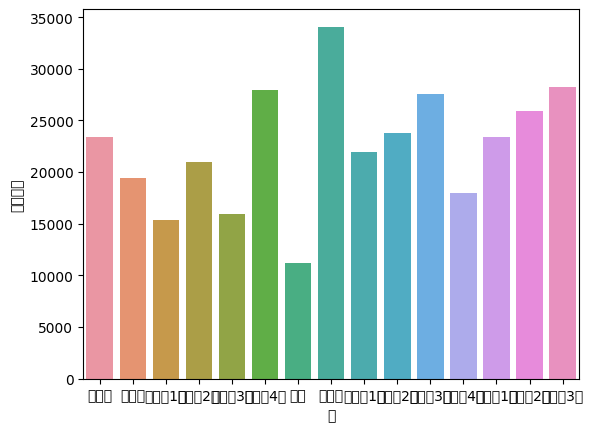

In [ ]:
sns.barplot(x='동',y='총인구수', data=pop_total[:][1:])
plt.show()